In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

# Autoencoder

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 53s 0us/step


In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0

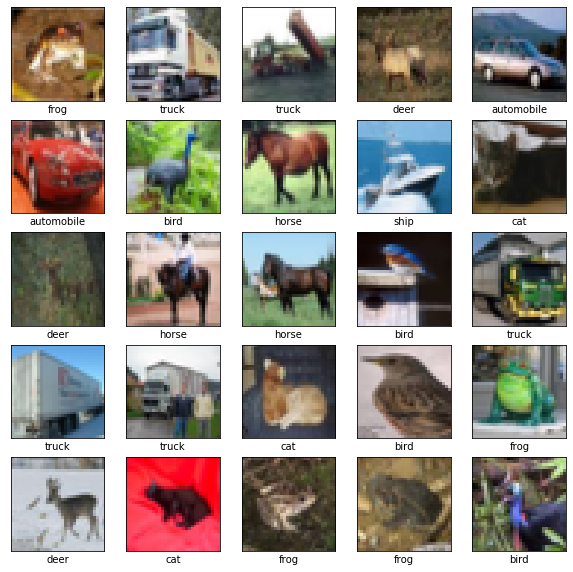

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [13]:
train_images.shape

(50000, 32, 32, 3)

In [36]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [38]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [42]:
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

In [43]:
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_images, test_images),
                callbacks=[es_cb])

Epoch 1/50
391/391 [==============================] - 134s 343ms/step - loss: 0.5757 - val_loss: 0.5754
Epoch 2/50
391/391 [==============================] - 127s 325ms/step - loss: 0.5727 - val_loss: 0.5728
Epoch 3/50
391/391 [==============================] - 130s 332ms/step - loss: 0.5708 - val_loss: 0.5721
Epoch 4/50
391/391 [==============================] - 127s 324ms/step - loss: 0.5693 - val_loss: 0.5696
Epoch 5/50
391/391 [==============================] - 128s 328ms/step - loss: 0.5684 - val_loss: 0.5688
Epoch 6/50
391/391 [==============================] - 128s 326ms/step - loss: 0.5675 - val_loss: 0.5686
Epoch 7/50
391/391 [==============================] - 128s 328ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 8/50
391/391 [==============================] - 129s 331ms/step - loss: 0.5665 - val_loss: 0.5672
Epoch 9/50
391/391 [==============================] - 129s 329ms/step - loss: 0.5660 - val_loss: 0.5664
Epoch 10/50
391/391 [==============================] - 125s 321m

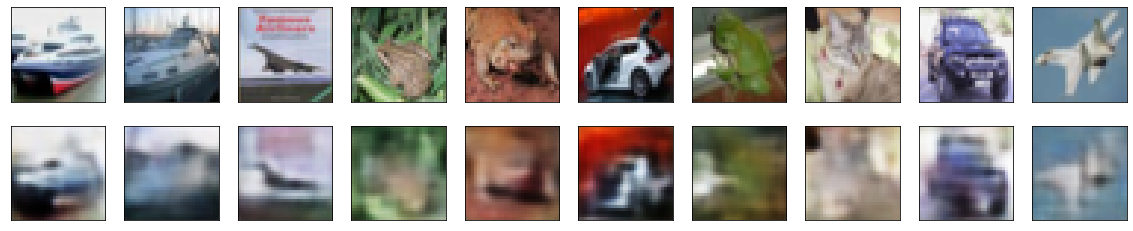

In [47]:
decoded_imgs = autoencoder.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Classification

## Deep CNN

In [64]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10))

In [65]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5321 - accuracy: 0.4422 - val_loss: 1.2820 - val_accuracy: 0.5265
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1718 - accuracy: 0.5832 - val_loss: 1.0539 - val_accuracy: 0.6262
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0148 - accuracy: 0.6437 - val_loss: 0.9714 - val_accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9107 - accuracy: 0.6789 - val_loss: 0.9426 - val_accuracy: 0.6744
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8415 - accuracy: 0.7034 - val_loss: 0.9004 - val_accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7879 - accuracy: 0.7243 - val_loss: 0.8973 - val_accuracy: 0.6862
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7421 - accuracy: 0.7398 - val_loss: 0.8667 -

313/313 - 1s - loss: 0.8609 - accuracy: 0.7076


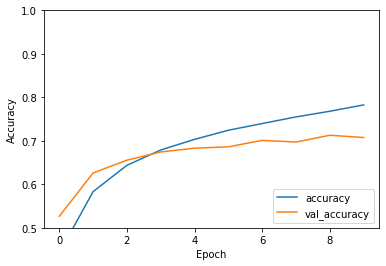

In [66]:
plt.plot(cnn.history.history['accuracy'], label='accuracy')
plt.plot(cnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)

## Transfer Learning

In [93]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

In [94]:
base_model.trainable = False

In [95]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10)

In [96]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 38s 25ms/step - loss: 2.0878 - accuracy: 0.2553 - val_loss: 1.9797 - val_accuracy: 0.3040
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9846 - accuracy: 0.2860 - val_loss: 1.9387 - val_accuracy: 0.3121
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9625 - accuracy: 0.2908 - val_loss: 1.9232 - val_accuracy: 0.3125
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.9535 - accuracy: 0.2957 - val_loss: 1.9161 - val_accuracy: 0.3130
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.9471 - accuracy: 0.2950 - val_loss: 1.9105 - val_accuracy: 0.3190
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9454 - accuracy: 0.2953 - val_loss: 1.9077 - val_accuracy: 0.3161
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9414 - accuracy: 0.2964 - val_loss: 1.9058 -

313/313 - 6s - loss: 1.9031 - accuracy: 0.3188


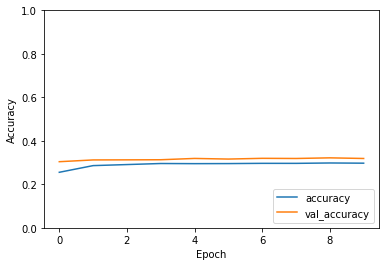

In [99]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Text Classication

In [102]:
import csv

texts = []
labels = []
with open('./SPAM_detection.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            texts.append(row[0])
            labels.append(int(row[1]))
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 5573 lines.


In [109]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
    

## RNN

In [110]:
VOCAB_SIZE=10000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_texts)

In [111]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [112]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [113]:
history = model.fit(train_texts, train_labels, epochs=10,
                    validation_data=(test_texts, test_labels),
                    validation_steps=30)

Epoch 1/10
140/140 [==============================] - 7s 48ms/step - loss: 0.5995 - accuracy: 0.8658 - val_loss: 0.4557 - val_accuracy: 0.8664
Epoch 2/10
140/140 [==============================] - 5s 34ms/step - loss: 0.3303 - accuracy: 0.8658 - val_loss: 0.2194 - val_accuracy: 0.8664
Epoch 3/10
140/140 [==============================] - 5s 35ms/step - loss: 0.1462 - accuracy: 0.9082 - val_loss: 0.1158 - val_accuracy: 0.9776
Epoch 4/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0648 - accuracy: 0.9850 - val_loss: 0.0858 - val_accuracy: 0.9857
Epoch 5/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0352 - accuracy: 0.9926 - val_loss: 0.0844 - val_accuracy: 0.9839
Epoch 6/10
140/140 [==============================] - 5s 36ms/step - loss: 0.0239 - accuracy: 0.9948 - val_loss: 0.0868 - val_accuracy: 0.9865
Epoch 7/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.0869 - val_accuracy: 0.9865

In [114]:
test_loss, test_acc = model.evaluate(test_texts, test_labels)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

35/35 [==============================] - 0s 7ms/step - loss: 0.1103 - accuracy: 0.9857
Test Loss: 0.1103443130850792
Test Accuracy: 0.9856502413749695


In [117]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0, 0.6292350301519036)

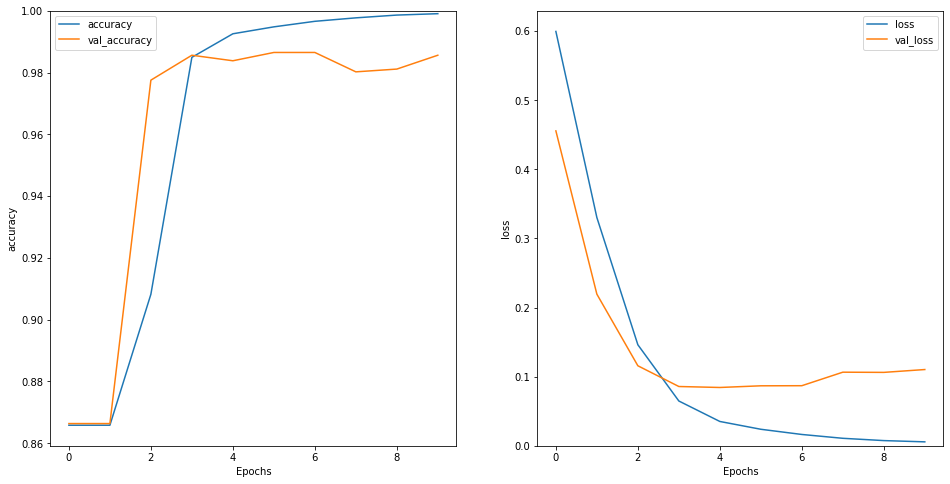

In [118]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

## CNN

In [121]:

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [122]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [123]:
history = model.fit(train_texts, train_labels, epochs=10,
                    validation_data=(test_texts, test_labels),
                    validation_steps=30)

Epoch 1/10
140/140 [==============================] - 1s 9ms/step - loss: 0.5595 - accuracy: 0.8658 - val_loss: 0.4137 - val_accuracy: 0.8664
Epoch 2/10
140/140 [==============================] - 1s 8ms/step - loss: 0.3890 - accuracy: 0.8658 - val_loss: 0.3733 - val_accuracy: 0.8664
Epoch 3/10
140/140 [==============================] - 1s 8ms/step - loss: 0.3581 - accuracy: 0.8658 - val_loss: 0.3437 - val_accuracy: 0.8664
Epoch 4/10
140/140 [==============================] - 1s 7ms/step - loss: 0.3097 - accuracy: 0.8672 - val_loss: 0.2692 - val_accuracy: 0.8682
Epoch 5/10
140/140 [==============================] - 1s 8ms/step - loss: 0.2095 - accuracy: 0.8932 - val_loss: 0.1653 - val_accuracy: 0.9318
Epoch 6/10
140/140 [==============================] - 1s 8ms/step - loss: 0.1249 - accuracy: 0.9554 - val_loss: 0.1086 - val_accuracy: 0.9686
Epoch 7/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0806 - accuracy: 0.9751 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 

(0, 0.5857918813824654)

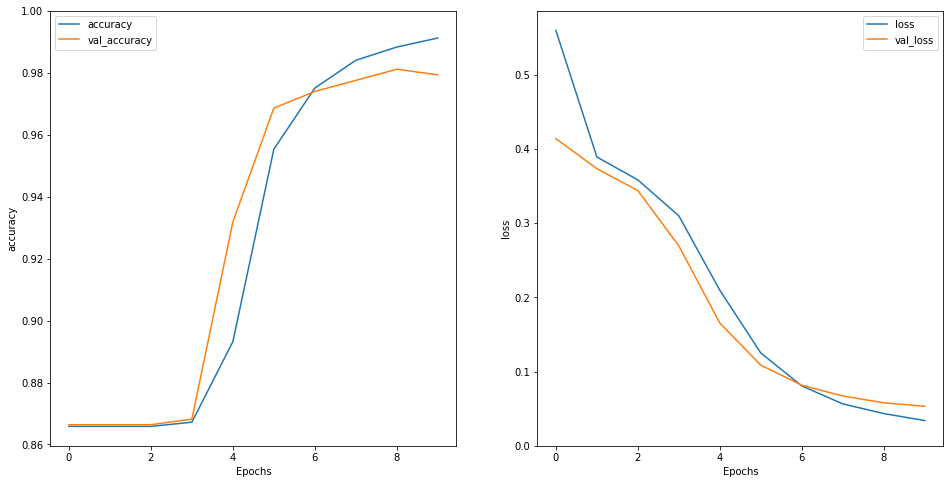

In [124]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)